In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **importing the data**

In [4]:
data=pd.read_excel("Linear Regression (1).xlsx")

In [5]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


### EDA

In [6]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [11]:
data.isnull().sum().sum()

0

In [17]:
data.isna().sum().sum()

0

In [18]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE31601EB8>,
      dtype=object)

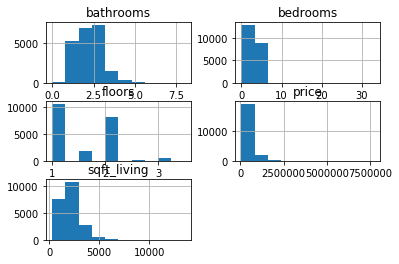

In [20]:
data.hist()

In [22]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


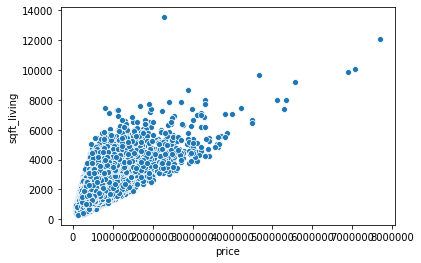

In [23]:
sns.scatterplot(data["price"],data["sqft_living"])

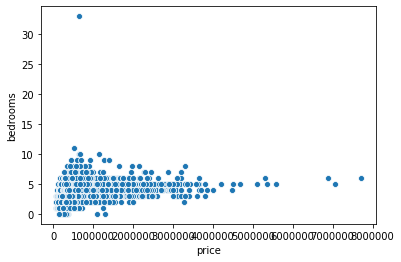

In [25]:
sns.scatterplot(data["price"],data["bedrooms"])

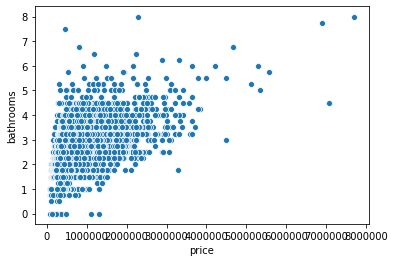

In [26]:
sns.scatterplot(data["price"],data["bathrooms"])

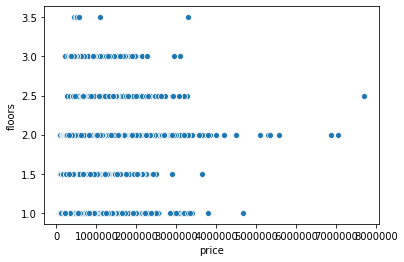

In [27]:
sns.scatterplot(data["price"],data["floors"])

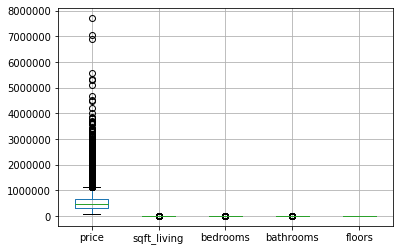

In [28]:
data.boxplot()

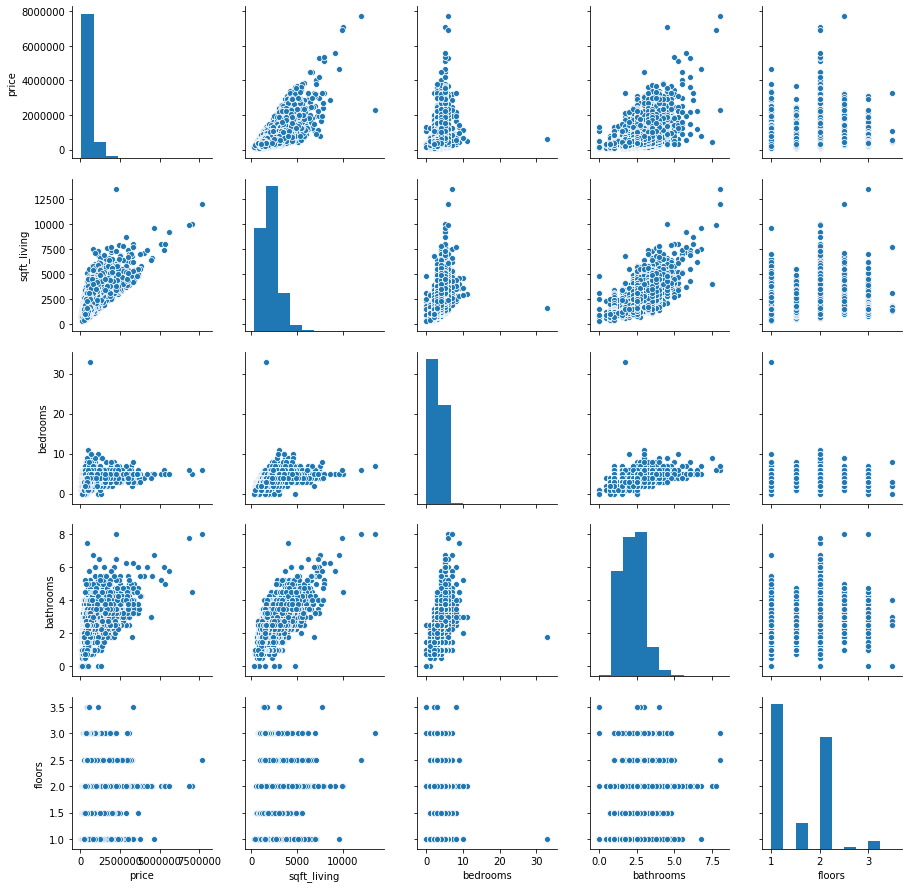

In [29]:
sns.pairplot(data)

In [30]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


### **Simple Linear Regression for price and sqft_living**

In [52]:
x=data.iloc[:,1:2]

In [53]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [54]:
y=data.iloc[:,:1]

In [55]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [59]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lin_reg.coef_

array([[283.96855737]])

In [61]:
lin_reg.intercept_

array([-48257.06345556])

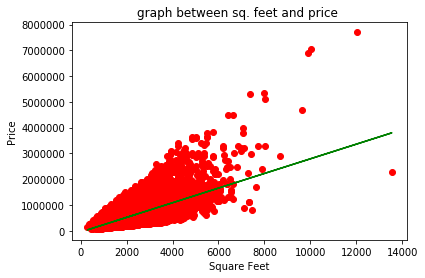

In [63]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [67]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


In [68]:
ypred=lin_reg.predict(X_test)

In [72]:
ypred

array([[ 357817.97358056],
       [1277876.09945262],
       [ 360657.65915424],
       ...,
       [ 337940.17456481],
       [ 221513.06604396],
       [ 417451.37062782]])

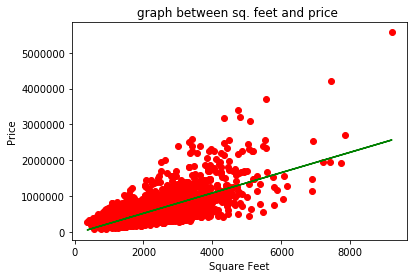

In [73]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

In [76]:
print("the RMSE is ",RMSE)
print("the R-Square is ",r_square)

the RMSE is  248879.06143647007
the R-Square is  0.47915770799654933


### **Simple Linear Regression for price and bedrooms**

In [78]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [79]:
x=data.iloc[:,2:3]

In [81]:
y=data.iloc[:,:1]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lin_reg.coef_

array([[123535.45915908]])

In [85]:
lin_reg.intercept_

array([126751.84604781])

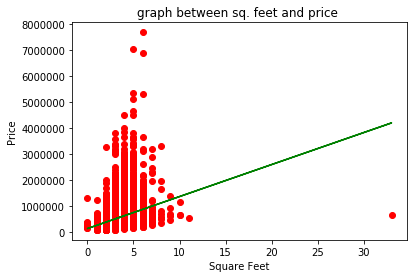

In [86]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [87]:
ypred=lin_reg.predict(X_test)

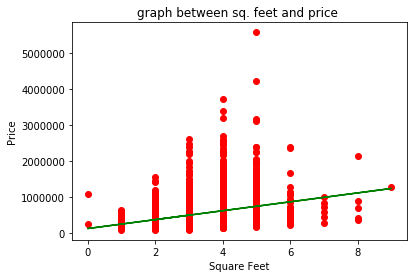

In [88]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [89]:
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("the RMSE is ",RMSE)
print("the R-Square is ",r_square)

the RMSE is  330690.0478733202
the R-Square is  0.08045757572566936


### **Simple Linear Regression for price and Bathroom**


In [91]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [92]:
x=data.iloc[:,3:4]
y=data.iloc[:,:1]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
print(lin_reg.coef_,lin_reg.intercept_)


[[253263.96384055]] [6313.08347882]


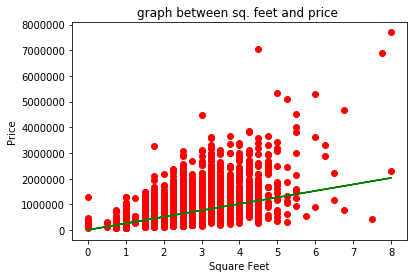

In [98]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [99]:
ypred=lin_reg.predict(X_test)

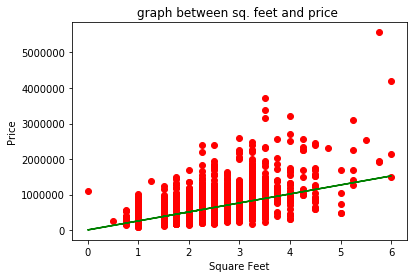

In [100]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [101]:
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("the RMSE is ",RMSE)
print("the R-Square is ",r_square)

the RMSE is  293733.1147146452
the R-Square is  0.2745034662728696


### **Simple Linear Regression for price and floors**


In [102]:
x=data.iloc[:,4:5]
y=data.iloc[:,:1]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print(lin_reg.coef_,lin_reg.intercept_)


[[174964.59154108]] [280691.95125499]


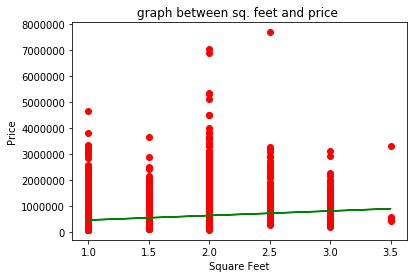

In [106]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [107]:
ypred=lin_reg.predict(X_test)

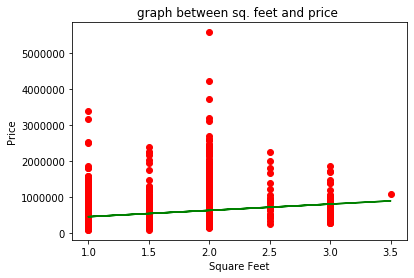

In [108]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color='green')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("graph between sq. feet and price ")
plt.show()

In [109]:
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("the RMSE is ",RMSE)
print("the R-Square is ",r_square)

the RMSE is  332722.48429265054
the R-Square is  0.06911973999204302
